In [14]:
import matplotlib.pyplot as plt
import pathlib
import json

First implete a single plot version, later will support plotting on various versions and comparison.

In [15]:
ouput_dir = pathlib.Path('output')
log_file = ouput_dir / '1684844148-quick_count.log'

with open(log_file) as f:
    # read one line by json
    lines_data = [json.loads(line) for line in f.readlines()]

# STAT_ITEMS = ['build_cycles', 'traverse_cycles', 'total_flops', 'build_nodes']

tri_num_list = [line['tri_num'] for line in lines_data]
build_cycles_list = [line['build_cycles'] for line in lines_data]
traverse_cycles_list = [line['traverse_cycles'] for line in lines_data]
total_flops_list = [line['total_flops'] for line in lines_data]
run_time_list = [line['run_time'] for line in lines_data]

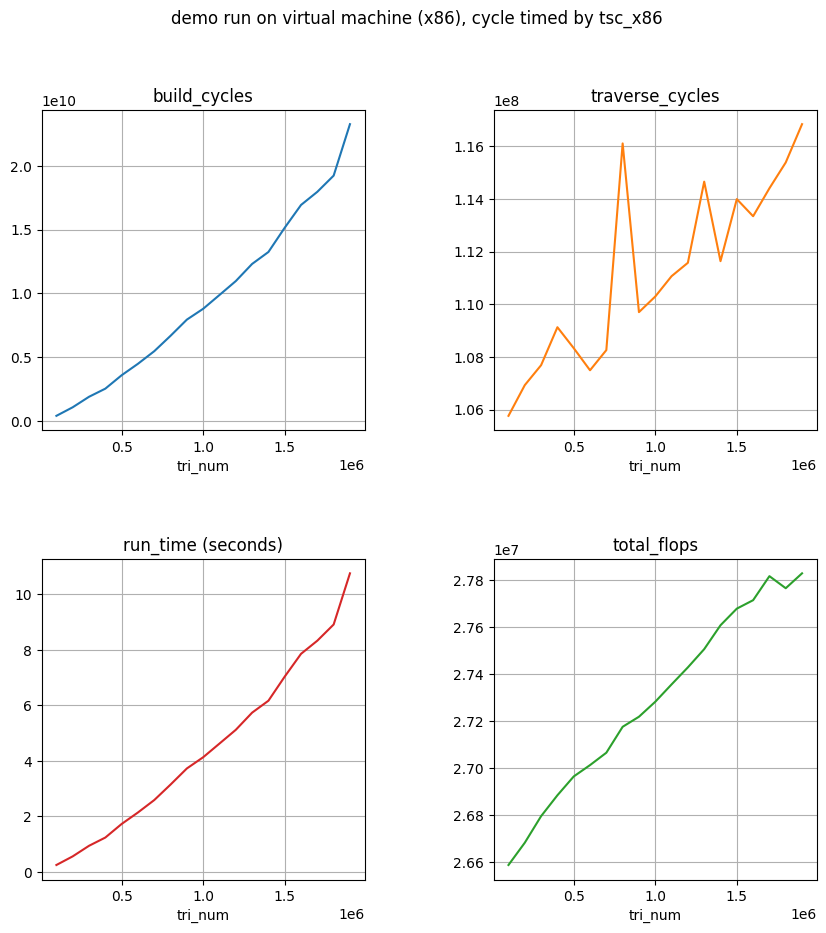

In [18]:
# plot four figures, tri_num is the x axis
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Set subplot size to (6, 6)
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase margin between subplots
fig.suptitle("demo run on virtual machine (x86), cycle timed by tsc_x86")

build_ax = axs[0, 0]
build_ax.plot(tri_num_list, build_cycles_list)
build_ax.set_title('build_cycles')
build_ax.set_xlabel('tri_num')  # Add x-axis label

traverse_ax = axs[0, 1]
traverse_ax.plot(tri_num_list, traverse_cycles_list)
traverse_ax.set_title('traverse_cycles')
traverse_ax.set_xlabel('tri_num')  # Add x-axis label

runtime_ax = axs[1, 0]
runtime_ax.plot(tri_num_list, run_time_list)
runtime_ax.set_title('run_time (seconds)')
runtime_ax.set_xlabel('tri_num')  # Add x-axis label

flops_ax = axs[1, 1]
flops_ax.plot(tri_num_list, total_flops_list)
flops_ax.set_title('total_flops')
flops_ax.set_xlabel('tri_num')  # Add x-axis label

# common settings
for ax in axs.flat:
    ax.grid(True)

plt.show()
